# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Create list
city_data = []

print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
set_count = 1

# Loop through cities in list
for city in cities:

    try:
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        response = requests.get(query_url + city).json()
        
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]     
            
        # Add info into list
        city_data.append({"City": city.title(), 
                          "Latitude": lat, 
                          "Longitude": lng, 
                          "Max Temperature": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Date": date,
                          "Country": country})
    

    except:
        print("City not found. Skipping...")
        
    record_count += 1
    if record_count == 50:
        record_count = 1
        set_count += 1
        
print("-----------------------------")
print("Data Retrieval Complete")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | kapit
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | henties bay
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | artyom
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | novopetrovskoye
Processing Record 14 of Set 1 | egvekinot
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | tsihombe
Ci

Processing Record 42 of Set 4 | vallenar
Processing Record 43 of Set 4 | carauari
Processing Record 44 of Set 4 | praia
Processing Record 45 of Set 4 | punto fijo
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | gurgan
City not found. Skipping...
Processing Record 48 of Set 4 | middelkerke
Processing Record 49 of Set 4 | port lincoln
Processing Record 1 of Set 5 | cabedelo
Processing Record 2 of Set 5 | chagda
City not found. Skipping...
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | jacareacanga
Processing Record 5 of Set 5 | ardakan
Processing Record 6 of Set 5 | broken hill
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | komsomolskiy
Processing Record 9 of Set 5 | kazerun
Processing Record 10 of Set 5 | cherskiy
Processing Record 11 of Set 5 | soe
Processing Record 12 of Set 5 | saint george
Processing Record 13 of Set 5 | comrat
Processing Record 14 of Set 5 | pangnirtung
Processing Record 15 of Set 5 | raba

Processing Record 39 of Set 8 | podosinovets
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | pingzhuang
Processing Record 42 of Set 8 | goma
Processing Record 43 of Set 8 | aswan
Processing Record 44 of Set 8 | kalabo
Processing Record 45 of Set 8 | buritis
Processing Record 46 of Set 8 | iglesias
Processing Record 47 of Set 8 | irtyshskiy
Processing Record 48 of Set 8 | grindavik
Processing Record 49 of Set 8 | sioux lookout
Processing Record 1 of Set 9 | yucca valley
Processing Record 2 of Set 9 | kamenka
Processing Record 3 of Set 9 | labuhan
Processing Record 4 of Set 9 | urumqi
Processing Record 5 of Set 9 | arsenyev
Processing Record 6 of Set 9 | grand centre
City not found. Skipping...
Processing Record 7 of Set 9 | ponta delgada
Processing Record 8 of Set 9 | mlalo
Processing Record 9 of Set 9 | hit
Processing Record 10 of Set 9 | mehran
Processing Record 11 of Set 9 | angoram
Processing Record 12 of Set 9 | borlange
City not found. Skipping...
Processin

Processing Record 27 of Set 12 | neka
Processing Record 28 of Set 12 | grand-lahou
Processing Record 29 of Set 12 | portobelo
Processing Record 30 of Set 12 | lamu
Processing Record 31 of Set 12 | tateyama
Processing Record 32 of Set 12 | tari
Processing Record 33 of Set 12 | hailey
Processing Record 34 of Set 12 | bulgan
Processing Record 35 of Set 12 | ajdabiya
Processing Record 36 of Set 12 | kyabe
Processing Record 37 of Set 12 | auki
Processing Record 38 of Set 12 | rampura
Processing Record 39 of Set 12 | wagar
Processing Record 40 of Set 12 | daru
Processing Record 41 of Set 12 | lhuntshi
City not found. Skipping...
Processing Record 42 of Set 12 | toora-khem
Processing Record 43 of Set 12 | torbat-e jam
Processing Record 44 of Set 12 | warrnambool
Processing Record 45 of Set 12 | caravelas
Processing Record 46 of Set 12 | moron
Processing Record 47 of Set 12 | jerez
Processing Record 48 of Set 12 | collie
Processing Record 49 of Set 12 | aras
Processing Record 1 of Set 13 | san

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame(city_data)
city_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date,Country
0,Jamestown,42.0970,-79.2353,64.71,90,90,3.00,1627811429,US
1,Kapit,2.0167,112.9333,78.58,90,100,4.92,1627811329,MY
2,Atuona,-9.8000,-139.0333,77.23,64,85,13.82,1627811429,PF
3,Hobart,-42.8794,147.3294,44.06,74,20,4.00,1627811430,AU
4,Saskylakh,71.9167,114.0833,83.30,27,66,8.55,1627811391,RU
...,...,...,...,...,...,...,...,...,...
550,La Cruz,23.9167,-106.9000,78.48,95,100,3.44,1627811494,MX
551,Sharan,54.8167,54.0000,86.22,30,76,12.35,1627811494,RU
552,At-Bashi,41.1702,75.8106,79.00,22,53,2.35,1627811494,KG
553,Los Llanos De Aridane,28.6585,-17.9182,71.13,85,40,20.71,1627811495,ES


In [7]:
city_df.to_csv(r".\output_data\Cities.csv", index_label="City ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.727056,19.210569,71.905423,66.488288,52.472072,7.958685,1.627811e+09
std,32.840610,90.038492,15.231744,24.402709,38.867086,5.602169,4.640667e+01
min,-54.800000,-179.166700,27.000000,6.000000,0.000000,0.000000,1.627811e+09
25%,-7.140800,-58.635000,62.260000,52.500000,8.000000,3.780000,1.627811e+09
50%,23.916700,25.970400,74.030000,73.000000,61.000000,6.730000,1.627811e+09
75%,47.835500,96.147600,82.300000,85.000000,90.500000,11.195000,1.627811e+09
max,78.218600,179.316700,113.110000,100.000000,100.000000,27.810000,1.627811e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_city = city_df[(city_df["Humidity"] > 100)].index
                                  
humid_city

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city = city_df.drop(humid_city, inplace=False)
clean_city.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date,Country
0,Jamestown,42.0970,-79.2353,64.71,90,90,3.00,1627811429,US
1,Kapit,2.0167,112.9333,78.58,90,100,4.92,1627811329,MY
2,Atuona,-9.8000,-139.0333,77.23,64,85,13.82,1627811429,PF
3,Hobart,-42.8794,147.3294,44.06,74,20,4.00,1627811430,AU
4,Saskylakh,71.9167,114.0833,83.30,27,66,8.55,1627811391,RU


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

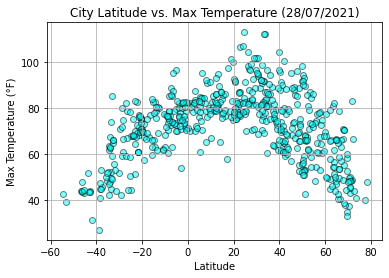

In [81]:
# Build Scatter Plot 
plt.figure(figsize = (6, 4))
plt.scatter(clean_city["Latitude"], clean_city["Max Temperature"], facecolors="cyan", marker="o", edgecolor="black", alpha=0.5)

plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (28/07/2021)")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/Latitude_vs_Max_Temperature.png")
plt.show()


This plot is showing the relationship between temperatre and latitude. The plot indicates that the temperature is greater at and around the equator (latitude 0), than it is further away from the equator at a Latitude of -60 and 70.

## Latitude vs. Humidity Plot

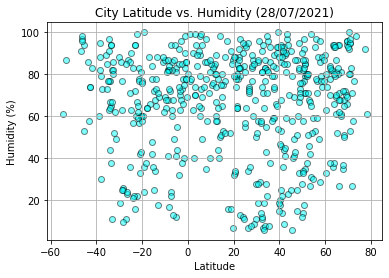

In [82]:
# Build Scatter Plot 
plt.figure(figsize = (6, 4))
plt.scatter(clean_city["Latitude"], clean_city["Humidity"], facecolors="cyan", marker="o", edgecolor="black", alpha=0.5)

plt.title("City Latitude vs. Humidity (28/07/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/Latitude_vs_Humidity.png")
plt.show()

This scatter plot doesn't show much correlation between Latitude and Humidity. Although there seems to be a greater humidity directly at the equator and furthest away from the equator. The lowest Humidity (%) can be found at city latitudes between -40 and -10, and at latitudes of 20 to 50.

## Latitude vs. Cloudiness Plot

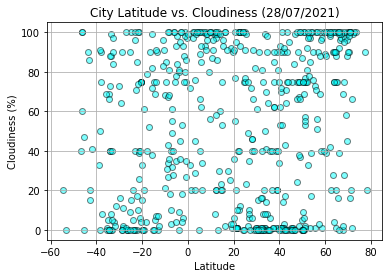

In [83]:
# Build Scatter Plot 
plt.figure(figsize = (6, 4))
plt.scatter(clean_city["Latitude"], clean_city["Cloudiness"], facecolors="cyan", marker="o", edgecolor="black", alpha=0.5)

plt.title("City Latitude vs. Cloudiness (28/07/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/Latitude_vs_Cloudiness.png")
plt.show()

This scatter plot shows the relationship between Latitude and Cloudiness, and concludes that there isn't much correlation between the two.

## Latitude vs. Wind Speed Plot

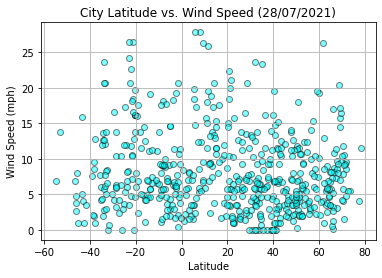

In [84]:
# Build Scatter Plot 
plt.figure(figsize = (6, 4))
plt.scatter(clean_city["Latitude"], clean_city["Wind Speed"], facecolors="cyan", marker="o", edgecolor="black", alpha=0.5)

plt.title("City Latitude vs. Wind Speed (28/07/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/Latitude_vs_Wind_Speed.png")
plt.show()

This plot looks at the relationship between Latitude and Wind Speed. From this scatter plot there doesn't seem to be a clear correlation between the two.

## Linear Regression

In [71]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Scatter Plot
    plt.scatter(x_values,y_values, facecolors="cyan", marker="o", edgecolor="black", alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [72]:
# Create Northern and Southern Hemisphere DataFrames
north_df = clean_city.loc[clean_city["Latitude"] >= 0,:]
south_df = clean_city.loc[clean_city["Latitude"] < 0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.5991514960130798


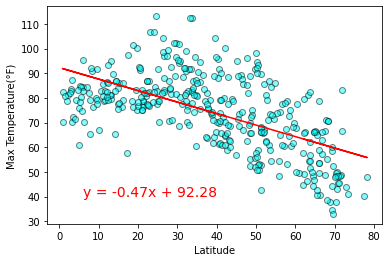

In [73]:
x_values = north_df["Latitude"]
y_values = north_df["Max Temperature"]
plot_linear_regression(x_values,y_values,'Max Temperature(°F)',(6,40))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7463913445432077


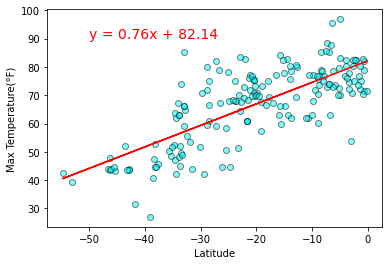

In [74]:
x_values = south_df["Latitude"]
y_values = south_df["Max Temperature"]
plot_linear_regression(x_values,y_values,'Max Temperature(°F)',(-50,90))

Both the Northern and Southern Hemispheres show a correlation between Latitude and Temperature. As you get closer to the equator (latitude 0) the higher the temperature gets, and further away from the equator has lower temperatures. This relationship is seen in both northern and southern hemispheres, however the correlation coefficient indicates a strong positive correlation in the Southern hemisphere, and a weak negative correlation in the northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000583206757025017


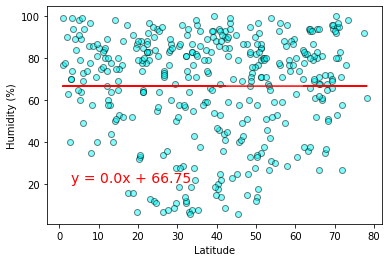

In [75]:
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity (%)',(3,21))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.04947069805108627


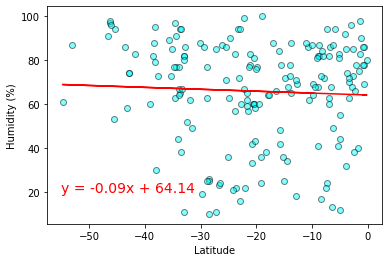

In [76]:
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity (%)', (-55,20))

In both northern and southern hemispheres, there is no correlation between humidity and latitude. The correlation coeffecient in the northern hemisphere is equal to 0.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07108318544764547


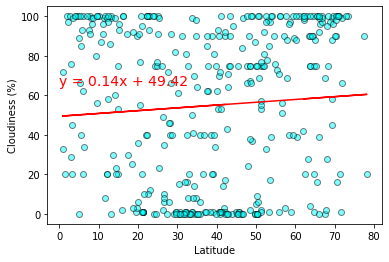

In [77]:
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(0,65))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20198411265518132


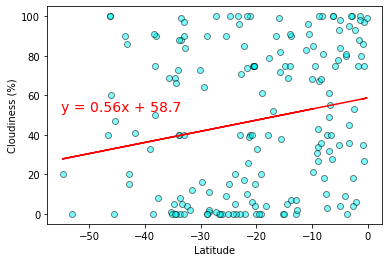

In [78]:
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(-55,52))


Initially, when looking at the plots no correlation can be seen between cloudiness and latitude. However, when the linear regression is performed, you can see that there is a moderate positive correlation in the Southern Hemisphere and a very low positive correlation in the Northern Hemisphere. The Southern hemisphere scatter plot shows it is more cloudy at the equator, and less cloudy further away. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13077505054521826


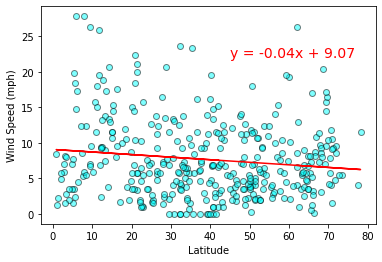

In [79]:
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(45,22))



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0028926624561141875


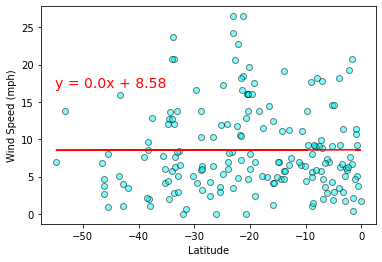

In [80]:
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(-55,17))



There is no clear correlation shown between wind speed and latitude in both northern and southern hemisphere plots. However, the linear regression shows a very weak correlation between wind speeds being lower away from the equator, and higher nearer to the equator.